# Importing Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv('Crop.csv')

In [14]:
data.head()

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K,Cid
0,0,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,21
1,1,21.770462,80.319644,7.038096,226.655537,rice,80,40,40,21
2,2,23.004459,82.320763,7.840207,263.964248,rice,80,40,40,21
3,3,26.491096,80.158363,6.980401,242.864034,rice,80,40,40,21
4,4,20.130175,81.604873,7.628473,262.717340,rice,80,40,40,21


# Data Wrangling

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2200 non-null   int64  
 1   temperature  2200 non-null   float64
 2   humidity     2200 non-null   float64
 3   ph           2200 non-null   float64
 4   rainfall     2200 non-null   float64
 5   label        2200 non-null   object 
 6   N            2200 non-null   int64  
 7   P            2200 non-null   int64  
 8   K            2200 non-null   int64  
 9   Cid          2200 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 172.0+ KB


In [16]:
data.describe()

,Unnamed: 0,temperature,humidity,ph,rainfall,N,P,K,Cid
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1137.681818,25.616244,71.481779,6.469480,103.463655,50.454545,45.681818,48.181818,11.500000
std,660.706650,5.063749,22.263812,0.773938,54.958389,35.488826,31.891110,50.521281,6.345731
min,0.000000,8.825675,14.258040,3.504752,20.211267,20.000000,10.000000,10.000000,1.000000
25%,558.750000,22.769375,60.261953,5.971693,64.551686,20.000000,20.000000,20.000000,6.000000
50%,1150.500000,25.598693,80.473146,6.425045,94.867624,30.000000,40.000000,30.000000,11.500000
75%,1707.250000,28.561654,89.948771,6.923643,124.267508,80.000000,60.000000,50.000000,17.000000
max,2273.000000,43.675493,99.981876,9.935091,298.560117,120.000000,125.000000,200.000000,22.000000


In [17]:
data.dtypes

Unnamed: 0       int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
N                int64
P                int64
K                int64
Cid              int64
dtype: object

In [19]:
data.duplicated().sum()

0

In [21]:
data.shape

(2200, 10)

In [23]:
data.isnull().sum()

Unnamed: 0     0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
N              0
P              0
K              0
Cid            0
dtype: int64

In [25]:
data.isnull().sum().sum()

0

In [26]:
data.columns

Index(['Unnamed: 0', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'N',
       'P', 'K', 'Cid'],
      dtype='object')

In [27]:
shape=data.shape
print('Number of Rows : ',shape[0])
print('Number of Columns : ',shape[1])

Number of Rows :  2200
Number of Columns :  10


# Data Analysis

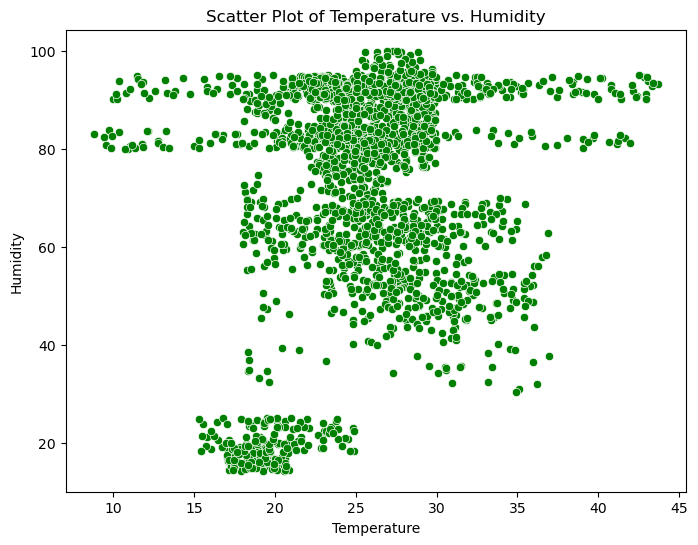

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='humidity', data=data, color='green')
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

In [32]:
subset = data[['temperature', 'humidity', 'ph', 'rainfall', 'N', 'P', 'K']]

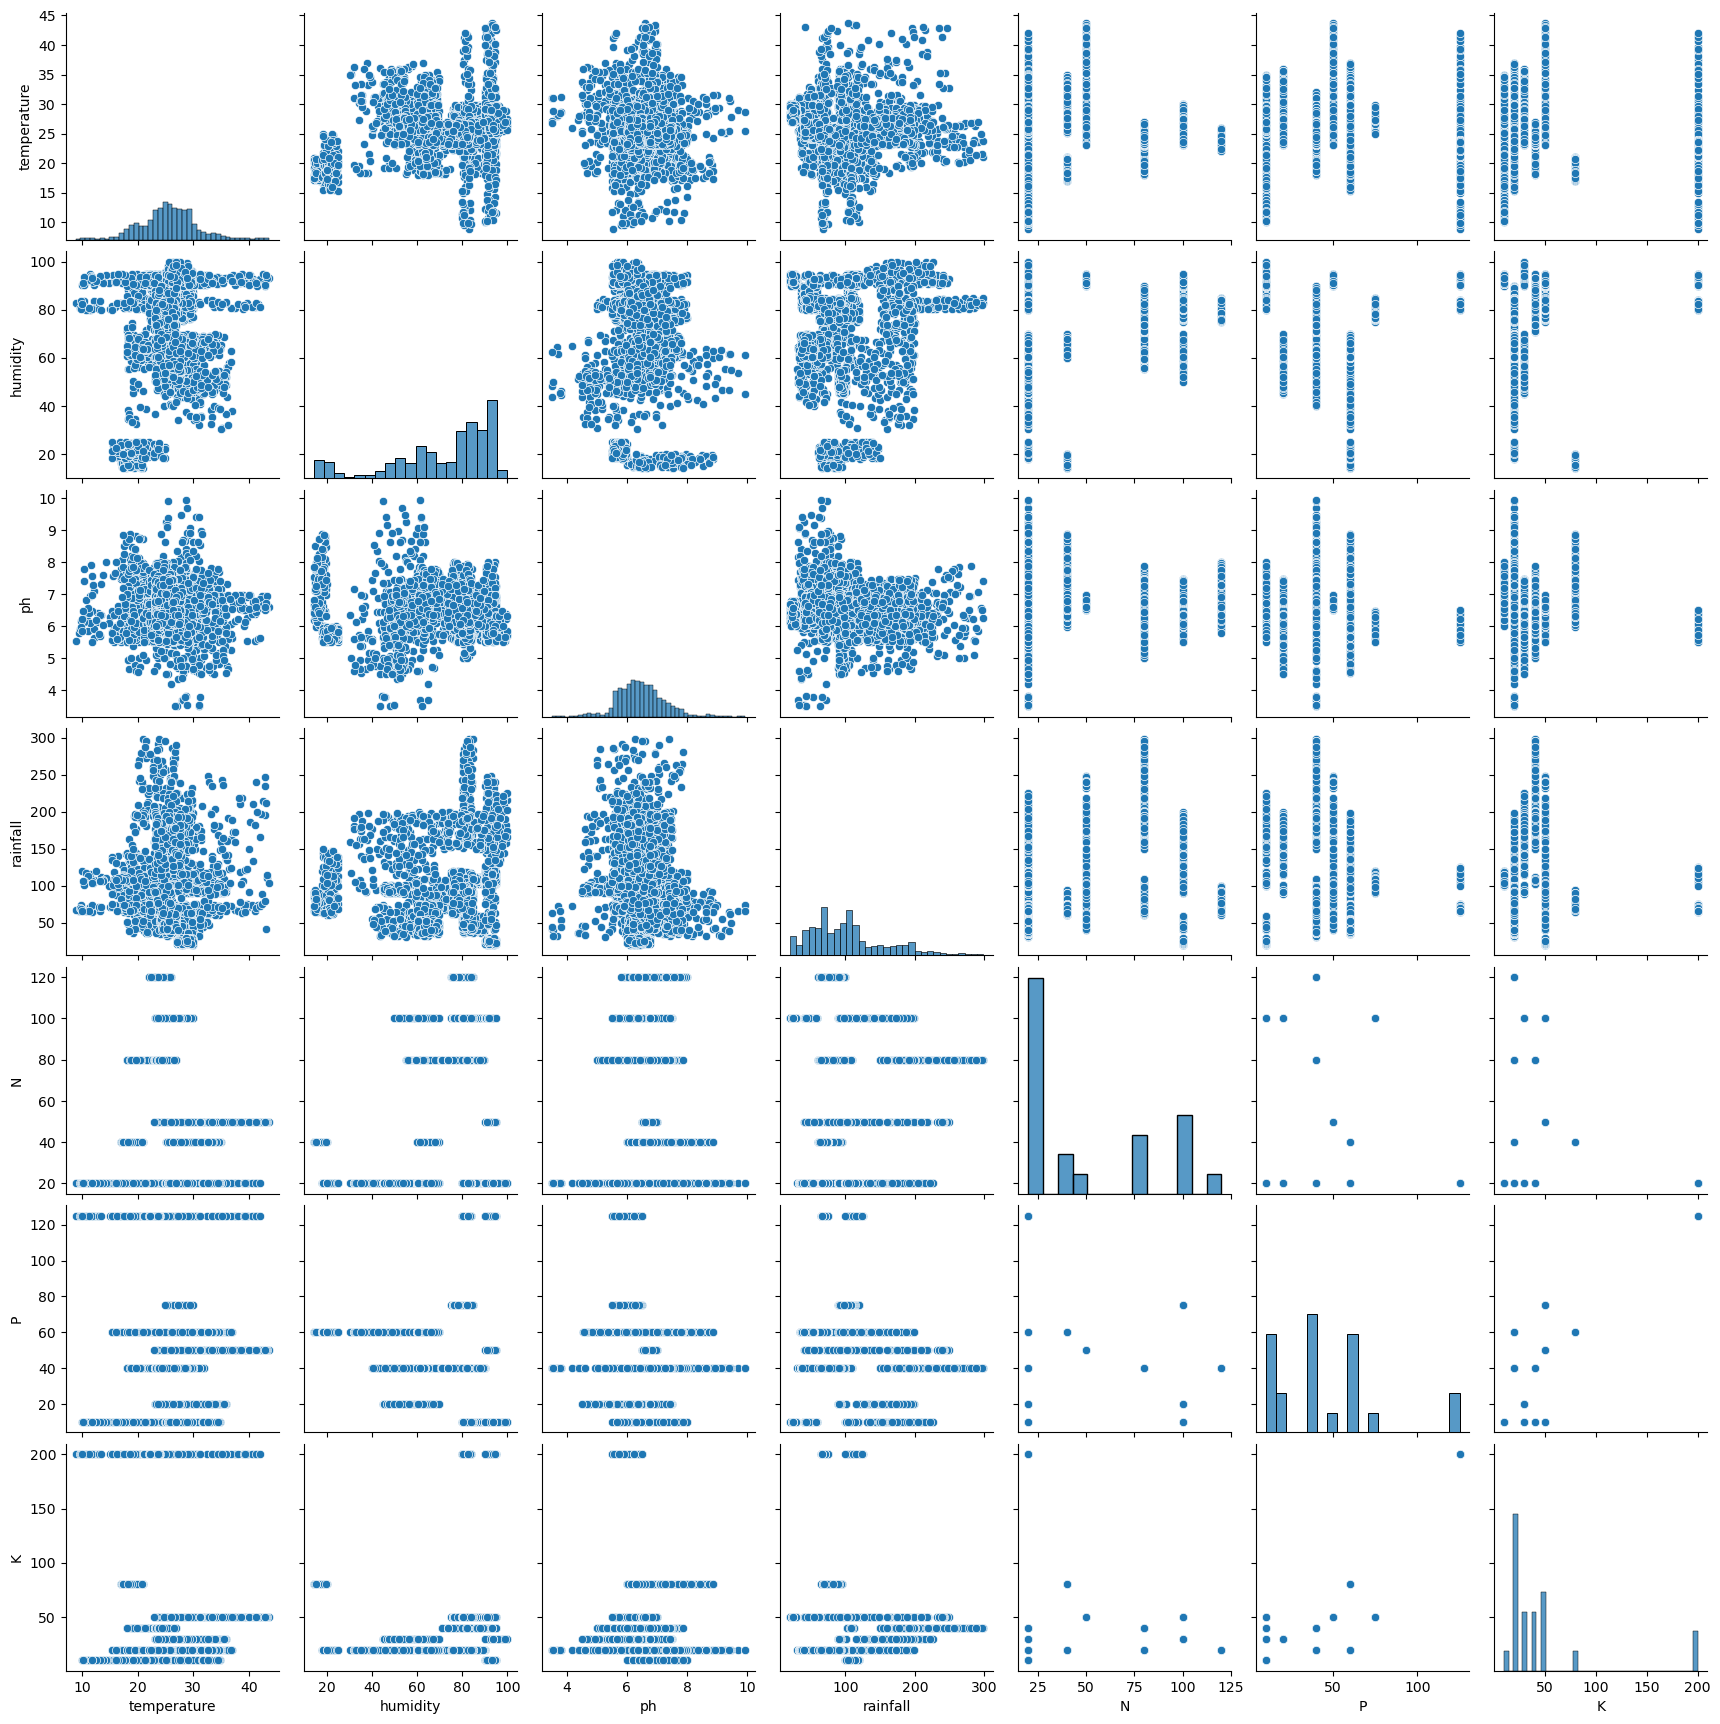

In [33]:
sns.pairplot(subset)
plt.show()

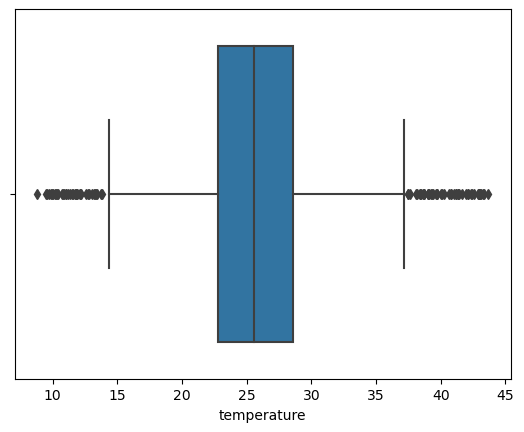

In [34]:
sns.boxplot(x=data['temperature'])
plt.show()

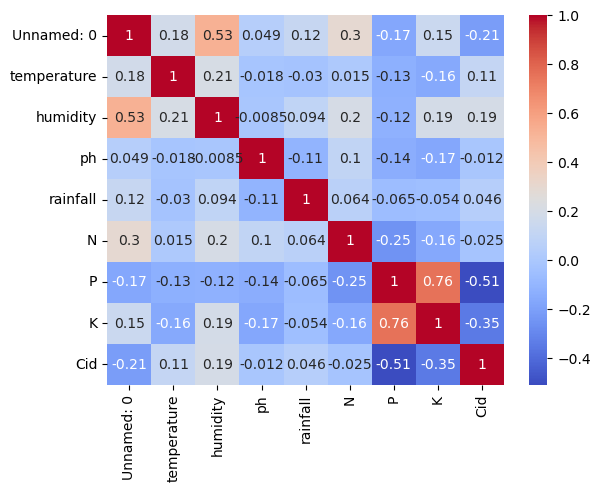

In [36]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

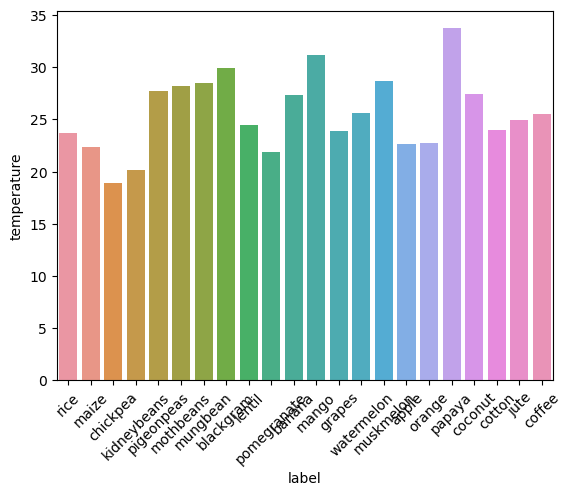

In [38]:
sns.barplot(data=data, x='label', y='temperature', ci=None)
plt.xticks(rotation=45)
plt.show()

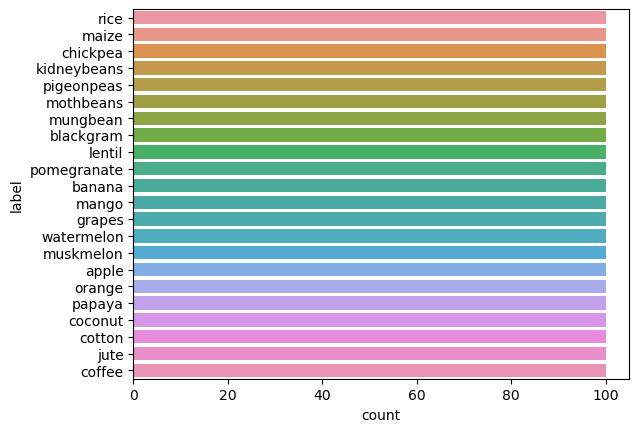

In [39]:
sns.countplot(data=data, y='label')
plt.show()

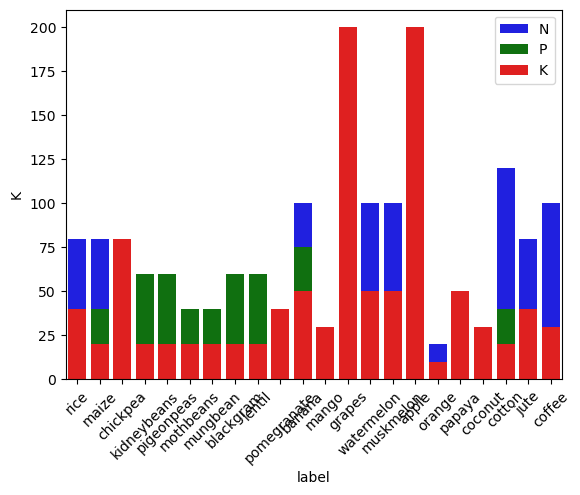

In [40]:
sns.barplot(data=data, x='label', y='N', color='b', label='N')
sns.barplot(data=data, x='label', y='P', color='g', label='P')
sns.barplot(data=data, x='label', y='K', color='r', label='K')
plt.legend()
plt.xticks(rotation=45)
plt.show()

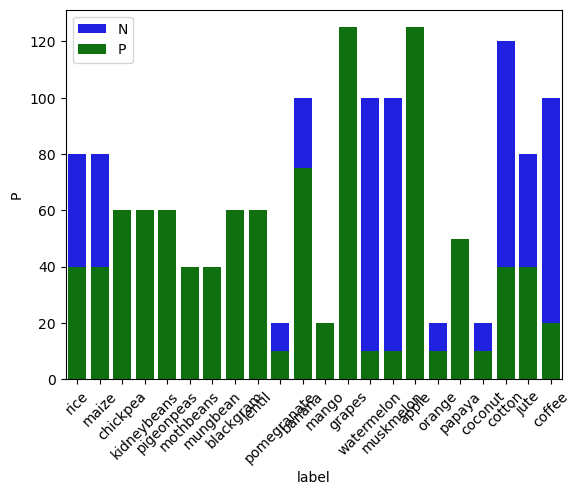

In [43]:
sns.barplot(data=data, x='label', y='N', color='b', label='N')
sns.barplot(data=data, x='label', y='P', color='g', label='P')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Data Processing

In [3]:
data_cid_label=data.iloc[:,[5,9]]
group_cid_label= data_cid_label.groupby(['Cid','label'])
B1=group_cid_label.first()
index = dict(B1.index)
print('Crop Name and ID -')
print(index)

Crop Name and ID -
{1: 'apple', 2: 'banana', 3: 'blackgram', 4: 'chickpea', 5: 'coconut', 6: 'coffee', 7: 'cotton', 8: 'grapes', 9: 'jute', 10: 'kidneybeans', 11: 'lentil', 12: 'maize', 13: 'mango', 14: 'mothbeans', 15: 'mungbean', 16: 'muskmelon', 17: 'orange', 18: 'papaya', 19: 'pigeonpeas', 20: 'pomegranate', 21: 'rice', 22: 'watermelon'}


In [4]:
x = data[['temperature', 'humidity','ph','rainfall','N','P','K']]
y = data['Cid']

In [5]:
temperature=float(input("Enter Temperature:"))
humidity=float(input("Enter humidity:"))
ph=float(input("Enter ph:"))
rainfall=float(input("Enter rainfall:"))
Nvalue=int(input("Enter N-value:"))
Pvalue=int(input("Enter P-value:"))
Kvalue=int(input("Enter K-value:"))

Enter Temperature:31
Enter humidity:60
Enter ph:5
Enter rainfall:100
Enter N-value:40
Enter P-value:60
Enter K-value:30


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train Data regressor Model

In [7]:
regressor = RandomForestClassifier(n_estimators=10, random_state=5)
regressor.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=5)

      temperature   humidity        ph    rainfall    N    P    K
1567    21.452787  90.745319  6.110219  116.703658   20  125  200
2031    23.765547  87.983299  6.334838  150.316615   80   40   40
2073    24.251335  89.864541  7.098228  175.174211   80   40   40
1374    26.904357  86.254262  6.727468   59.759800  100   10   50
279     17.182484  16.428918  7.561108   72.850173   40   60   80
...           ...        ...       ...         ...  ...  ...  ...
1033    28.654563  79.286937  5.695268  102.463378  100   75   50
1731    27.347349  94.177567  6.687088   40.351531   50   50   50
763     28.474423  63.536045  6.500145   69.527441   40   60   20
835     25.434598  69.126134  7.685959   41.026829   20   60   20
1653    17.249446  91.137728  6.543192  112.509052   20   10   10

[1760 rows x 7 columns]
1567     1
2031     9
2073     9
1374    22
279      4
        ..
1033     2
1731    18
763      3
835     11
1653    17
Name: Cid, Length: 1760, dtype: int64


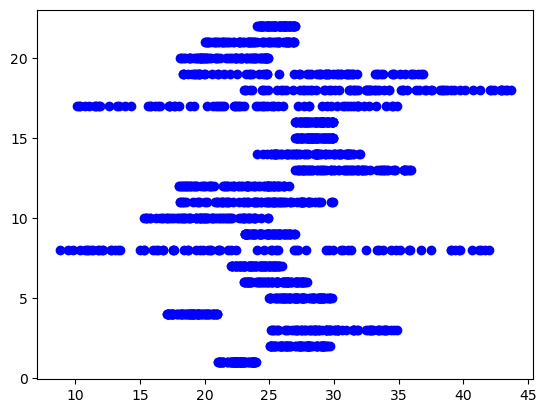

In [8]:
print(X_train)
print(y_train)
newtrain = np.hsplit(X_train, 7)
X_trainnew=newtrain[0]
plt.scatter(X_trainnew, y_train, color = 'blue')

# Test data model

[22 22  8  4  3 21 14 10 16  2 14  6 11 15 13  1  6 11  6 13  5  3 10  9
  7  6 11 17 14 10 20 21 12 16  5  7 13 13 22 14 12  3 19 22 19 15 10 10
  7 15 14  3  1 16 19  2 18 13 11  7 17 15 22 21 16  1  8  6  1 17  5 20
 10 12  8 14  4 12  9 13 21  3 22 22 16  7 12 11 14 18  3  9 15  8 15 12
  6  9 11  4 17  9 15  2  2 21 22  6 19 16 16 13  6  8 17 20 15 11 12  9
 20 11 17  4  4  3 20 17  4 18 14 14 16 15 12 15  5 20 17  3  3  8  1  6
  4  1  9 13 22 18 17  5 14  2 20  4 22  3  1  9 11 19 21 10 10 16 21 16
  2 17 19  1 14  5  7 15 10 20 18 17 21 18 18 19 10  2  5 19 21 18 12  9
 14 21 12  6 19  5  4 13  5 20 12 14 14 17 16 12 19  2  4  3 19 17 14 15
 13 18 16 20  9 21  3 18  3  6 12  6 17 21 14 15 17 10 20  5 13 15  7 21
  4 15  1 19  3 21 22  3 20 17 12  8  4 19  9 18 20  6 13 14  9 22 20 21
  8  5  9 11  4  6  6 18 20 12 21  4 19 17 20 19  5 10 20 16 14 13 11  2
  3 13 10 13  7 15 18  8  8 19 18  9 21  4 16  6 22 21  9 18  8 16  3 14
 14  4  3 13  2 13 20  9 17 16  4 11  7 18  8 10 11

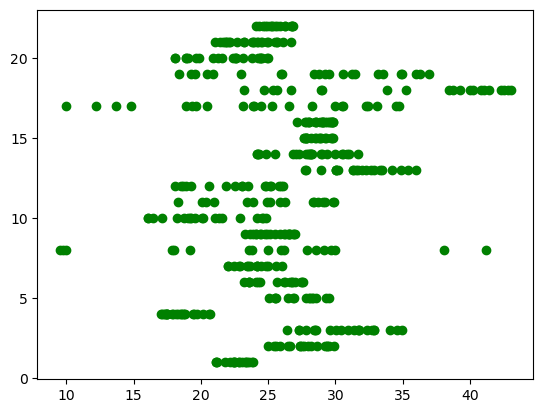

In [9]:
ytest_pred = regressor.predict(X_test)
print(ytest_pred)
newtest = np.hsplit(X_test, 7)
X_testnew=newtest[0]
plt.scatter(X_testnew,ytest_pred,color = 'green')

In [10]:
newpredicttest = np.array([temperature,humidity,ph,rainfall,Nvalue,Pvalue,Kvalue]).reshape(1, 7)
Ynewtest_pred = regressor.predict(newpredicttest)
pcropval=int(Ynewtest_pred[0])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Crop ID - 3
Crop Name - blackgram
Model Accuracy -  99.54545454545455 %


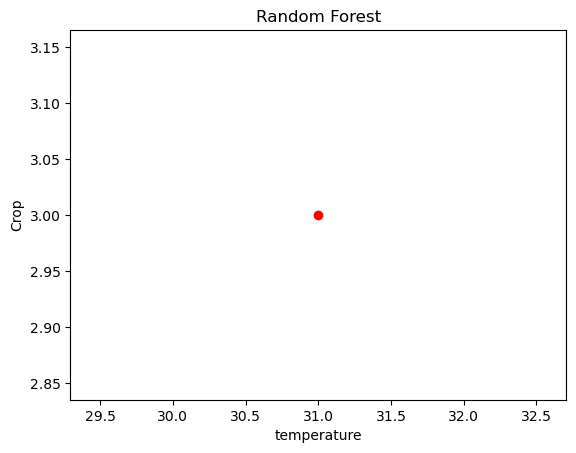

In [11]:
newptest = np.hsplit(newpredicttest, 7)
X_testnewpredict=newptest[0]
plt.scatter(X_testnewpredict,Ynewtest_pred,color = 'red')

print('Crop ID -',pcropval)
print('Crop Name -',index[pcropval])
print('Model Accuracy - ',accuracy_score(y_test, ytest_pred)*100,'%')

plt.title('Random Forest')
plt.xlabel('temperature')
plt.ylabel('Crop')
plt.show()